In [1]:
# Importing essential Libraries
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

## Reading and Understanding the data

In [77]:
#reading the Dataset
day = pd.read_csv('day.csv')
day.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        1           1   
1        2  02-01-2018       1   0     1        0        2           1   
2        3  03-01-2018       1   0     1        0        3           1   
3        4  04-01-2018       1   0     1        0        4           1   
4        5  05-01-2018       1   0     1        0        5           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [78]:
day.shape

(730, 16)

In [4]:
day.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Visualising the data

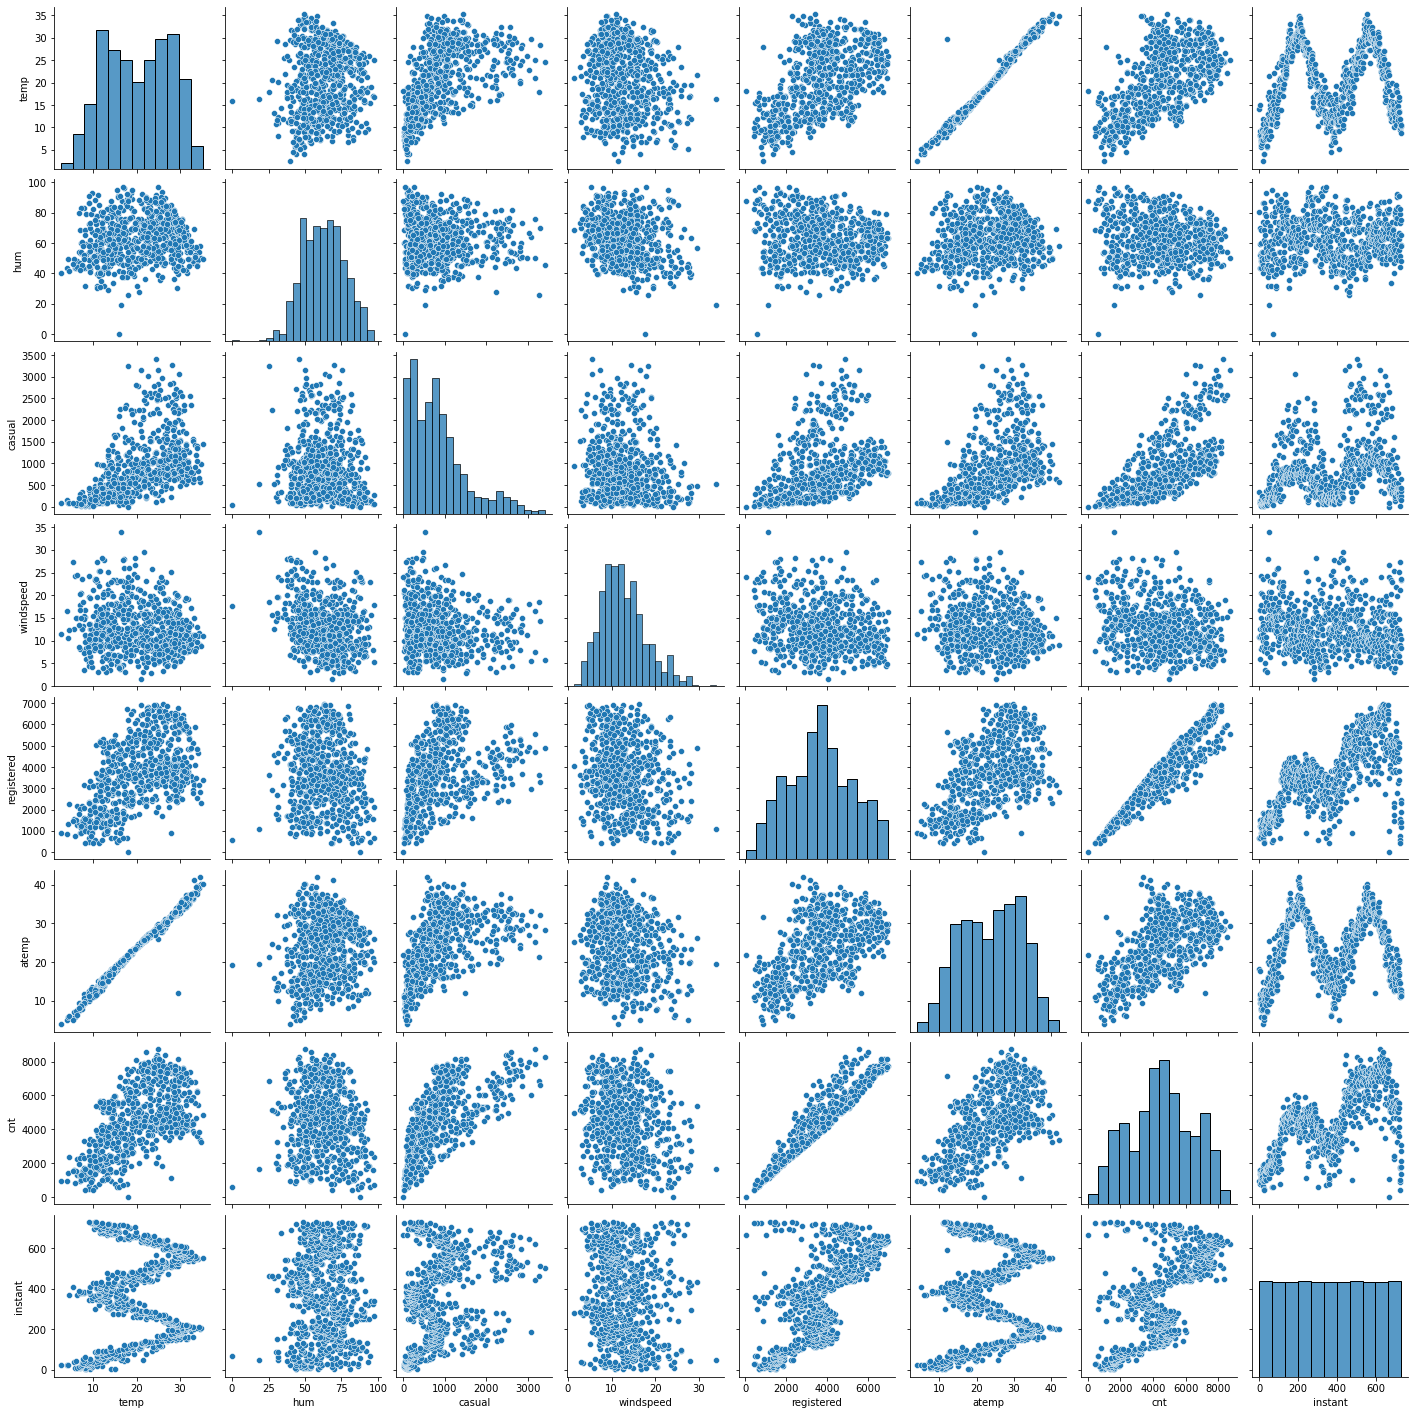

In [5]:
#visualizing the numeric variables
sns.pairplot(day, vars=["temp", "hum",'casual','windspeed','registered','atemp','cnt','instant'])
plt.show()

There seems to be strong correlation between cnt variable and temp, hum and windspeed variables.

In [79]:
#mapping categorical variables
day.season=day.season.map({1: 'spring', 2: 'summer',3:'fall', 4:'winter' })
day.mnth=day.mnth.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
day.weathersit=day.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Heavy Rain'})
day.weekday=day.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [7]:
day.head()

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     Mon           1   
1        2  02-01-2018  spring   0  Jan        0     Tue           1   
2        3  03-01-2018  spring   0  Jan        0     Wed           1   
3        4  04-01-2018  spring   0  Jan        0     Thu           1   
4        5  05-01-2018  spring   0  Jan        0     Fri           1   

      weathersit       temp     atemp      hum  windspeed  casual  registered  \
0  Mist + Cloudy  14.110847  18.18125  80.5833  10.749882     331         654   
1  Mist + Cloudy  14.902598  17.68695  69.6087  16.652113     131         670   
2          Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3          Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4          Clear   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

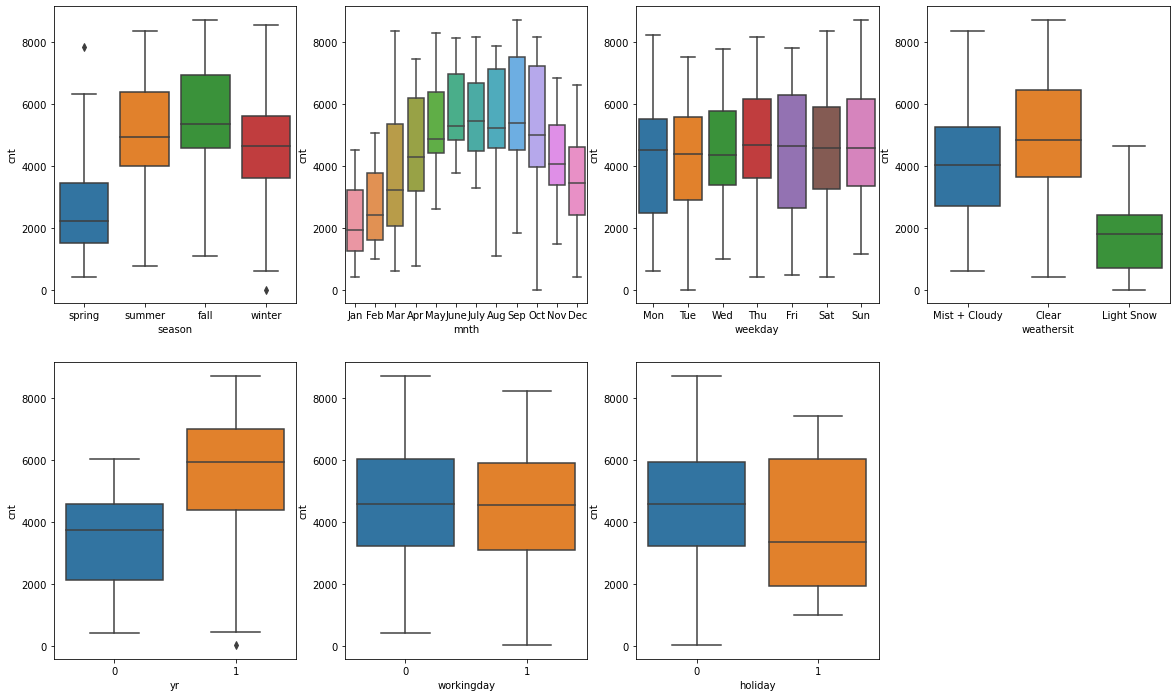

In [8]:
#visualizing the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2, 4, 1)
sns.boxplot(data=day, x='season', y='cnt')
plt.subplot(2, 4, 2)
sns.boxplot(data=day, x='mnth', y='cnt')
plt.subplot(2, 4, 3)
sns.boxplot(data=day, x='weekday', y='cnt')
plt.subplot(2, 4, 4)
sns.boxplot(data=day, x='weathersit', y='cnt')
plt.subplot(2, 4, 5)
sns.boxplot(data=day, x='yr', y='cnt')
plt.subplot(2, 4, 6)
sns.boxplot(data=day, x='workingday', y='cnt')
plt.subplot(2, 4, 7)
sns.boxplot(data=day, x='holiday', y='cnt')
plt.show()

1. Summer and fall seasons has the highest bike rental.
2. September and October months should the highest bike rental.
3. Saturday, Wednesday and Thursday are the weekdays where more bikes are rented.
4. Clear weather have most bike rental.
5. More bikes were rented in 2019.
6. There is not much difference in bike rental either on working day or non-working day.
7. Bike rentals are higher on holidays.

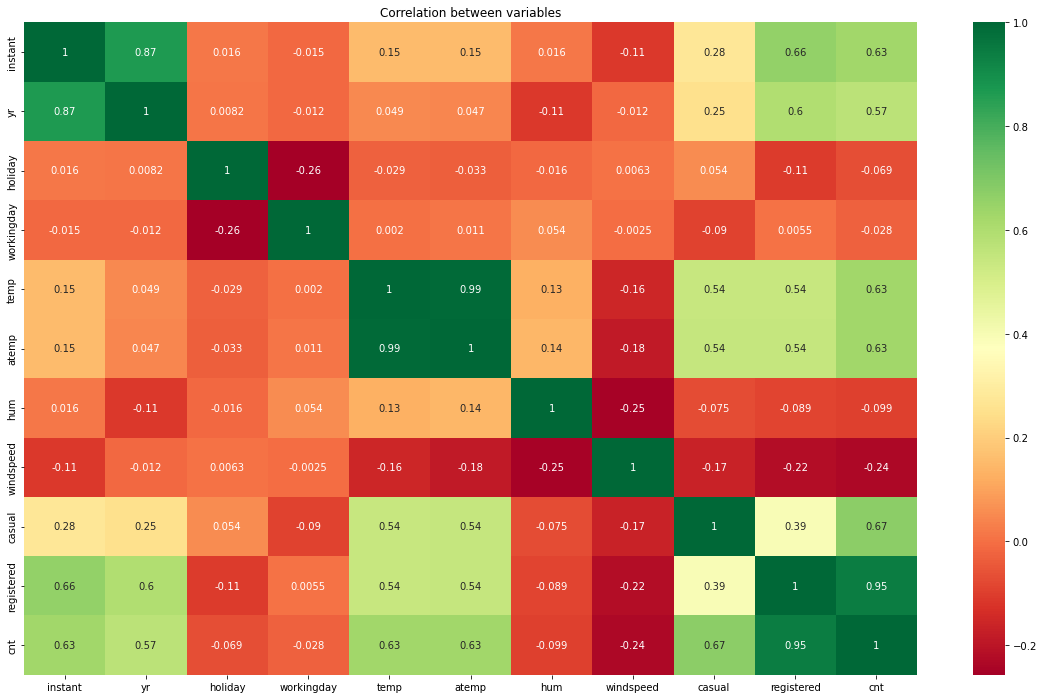

In [9]:
#checking correlation between variables
plt.figure(figsize=(20, 12))
sns.heatmap(day.corr(), cmap='RdYlGn', annot=True)
plt.title('Correlation between variables')
plt.show()

As there are variables which are correlated with cnt variable, we can proceed with buidling Linear Regression Model.

In [80]:
#dropping unnecessary variables
day = day.drop(['atemp', 'instant', 'dteday', 'casual', 'registered'], axis=1)
day.head(5)

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Tue           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0     Thu           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

       hum  windspeed   cnt  
0  80.5833  10.749882   985  
1  69.6087  16.652113   801  
2  43.7273  16.636703  1349  
3  59.0435  10.739832  1562  
4  43.6957  12.522300  1600

In [81]:
day.shape

(730, 11)

In [82]:
#creating dummy variables 
month = pd.get_dummies(day.mnth, drop_first=True)
weekday = pd.get_dummies(day.weekday, drop_first=True)
weathersit = pd.get_dummies(day.weathersit, drop_first=True)
season = pd.get_dummies(day.season, drop_first=True)

In [83]:
#concatenating with original dataframe
day = pd.concat([day,month, weekday, weathersit, season], axis=1)
day.head(5)

season  yr mnth  holiday weekday  workingday     weathersit       temp  \
0  spring   0  Jan        0     Mon           1  Mist + Cloudy  14.110847   
1  spring   0  Jan        0     Tue           1  Mist + Cloudy  14.902598   
2  spring   0  Jan        0     Wed           1          Clear   8.050924   
3  spring   0  Jan        0     Thu           1          Clear   8.200000   
4  spring   0  Jan        0     Fri           1          Clear   9.305237   

       hum  windspeed  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  \
0  80.5833  10.749882  ...    0    0    0    0    0           0   
1  69.6087  16.652113  ...    0    0    0    1    0           0   
2  43.7273  16.636703  ...    0    0    0    0    1           0   
3  59.0435  10.739832  ...    0    0    1    0    0           0   
4  43.6957  12.522300  ...    0    0    0    0    0           0   

   Mist + Cloudy  spring  summer  winter  
0              1       1       0       0  
1              1       1       0       0  
2              0       1       0       0  
3              0       1       0       0  
4              0       1       0       0  

[5 rows x 33 columns]

In [84]:
# dropping the original variables
day.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)
day.head(5)

yr  holiday  workingday       temp      hum  windspeed   cnt  Aug  Dec  \
0   0        0           1  14.110847  80.5833  10.749882   985    0    0   
1   0        0           1  14.902598  69.6087  16.652113   801    0    0   
2   0        0           1   8.050924  43.7273  16.636703  1349    0    0   
3   0        0           1   8.200000  59.0435  10.739832  1562    0    0   
4   0        0           1   9.305237  43.6957  12.522300  1600    0    0   

   Feb  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  spring  \
0    0  ...    0    0    0    0    0           0              1       1   
1    0  ...    0    0    0    1    0           0              1       1   
2    0  ...    0    0    0    0    1           0              0       1   
3    0  ...    0    0    1    0    0           0              0       1   
4    0  ...    0    0    0    0    0           0              0       1   

   summer  winter  
0       0       0  
1       0       0  
2       0       0  
3       0       0  
4       0       0  

[5 rows x 29 columns]

In [85]:
day.shape

(730, 29)

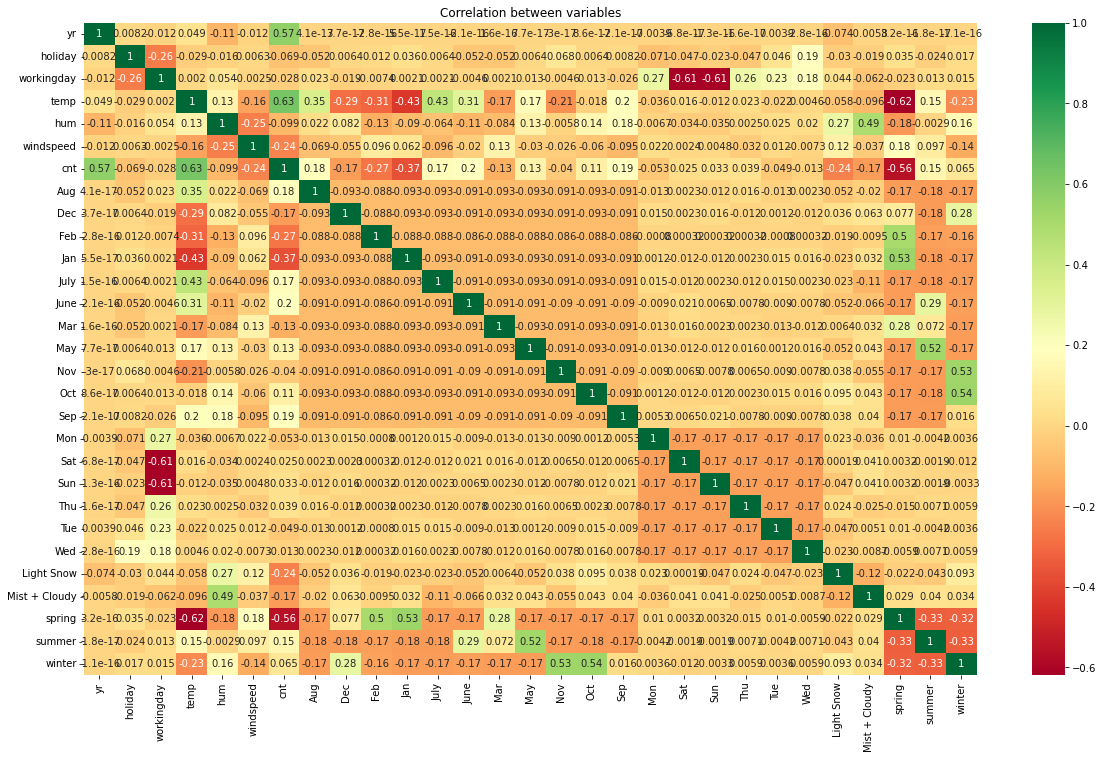

In [16]:
#checking correlation between variables
plt.figure(figsize=(20, 12))
sns.heatmap(day.corr(), cmap='RdYlGn', annot=True)
plt.title('Correlation between variables')
plt.show()

## Splitting the dataset into Training Set and Test Set

In [86]:
day_train, day_test = train_test_split(day, train_size=0.7, random_state=100)
print(day_train.shape)
print(day_test.shape)

(510, 29)
(220, 29)


In [87]:
day_train.head(5)

yr  holiday  workingday       temp      hum  windspeed   cnt  Aug  Dec  \
576   1        0           1  29.246653  70.4167  11.083475  7216    0    0   
426   1        0           0  16.980847  62.1250  10.792293  4066    0    0   
728   1        0           1  10.489153  48.3333  23.500518  1796    0    1   
482   1        0           0  15.443347  48.9583   8.708325  4220    0    0   
111   0        0           0  13.803347  72.9583  14.707907  1683    0    0   

     Feb  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  spring  \
576    0  ...    0    0    0    0    1           0              0       0   
426    0  ...    0    1    0    0    0           0              1       1   
728    0  ...    0    0    0    0    0           0              0       1   
482    0  ...    0    1    0    0    0           0              1       0   
111    0  ...    0    1    0    0    0           0              1       0   

     summer  winter  
576       0       0  
426       0       0  
728       0       0  
482       1       0  
111       1       0  

[5 rows x 29 columns]

## Rescaling the features

In [88]:
scaler = MinMaxScaler()

In [89]:
num_var = ['hum', 'windspeed', 'temp', 'cnt']
day_train[num_var] = scaler.fit_transform(day_train[num_var])
day_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  Aug  \
576   1        0           1  0.815169  0.725633   0.264686  0.827658    0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255    0   
728   1        0           1  0.245101  0.498067   0.663106  0.204096    0   
482   1        0           0  0.395666  0.504508   0.188475  0.482973    0   
111   0        0           0  0.345824  0.751824   0.380981  0.191095    0   

     Dec  Feb  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  \
576    0    0  ...    0    0    0    0    1           0              0   
426    0    0  ...    0    1    0    0    0           0              1   
728    1    0  ...    0    0    0    0    0           0              0   
482    0    0  ...    0    1    0    0    0           0              1   
111    0    0  ...    0    1    0    0    0           0              1   

     spring  summer  winter  
576       0       0       0  
426       1       0       0  
728       1       0       0  
482       0       1       0  
111       0       1       0  

[5 rows x 29 columns]

In [90]:
day_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537440    0.650480    0.320883   
std      0.500429    0.157763    0.453386    0.225858    0.145846    0.169803   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.542596    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt         Aug         Dec         Feb  ...         Sat  \
count  510.000000  510.000000  510.000000  510.000000  ...  510.000000   
mean     0.513499    0.096078    0.084314    0.066667  ...    0.129412   
std      0.224421    0.294988    0.278131    0.249689  ...    0.335985   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.000000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow  \
count  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.137255    0.143137    0.152941    0.135294    0.029412   
std      0.344454    0.350557    0.360284    0.342373    0.169124   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Mist + Cloudy      spring      summer      winter  
count     510.000000  510.000000  510.000000  510.000000  
mean        0.345098    0.243137    0.247059    0.247059  
std         0.475867    0.429398    0.431725    0.431725  
min         0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000  
75%         1.000000    0.000000    0.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

All the numeric variables are now scaled so that the max amount is 1.

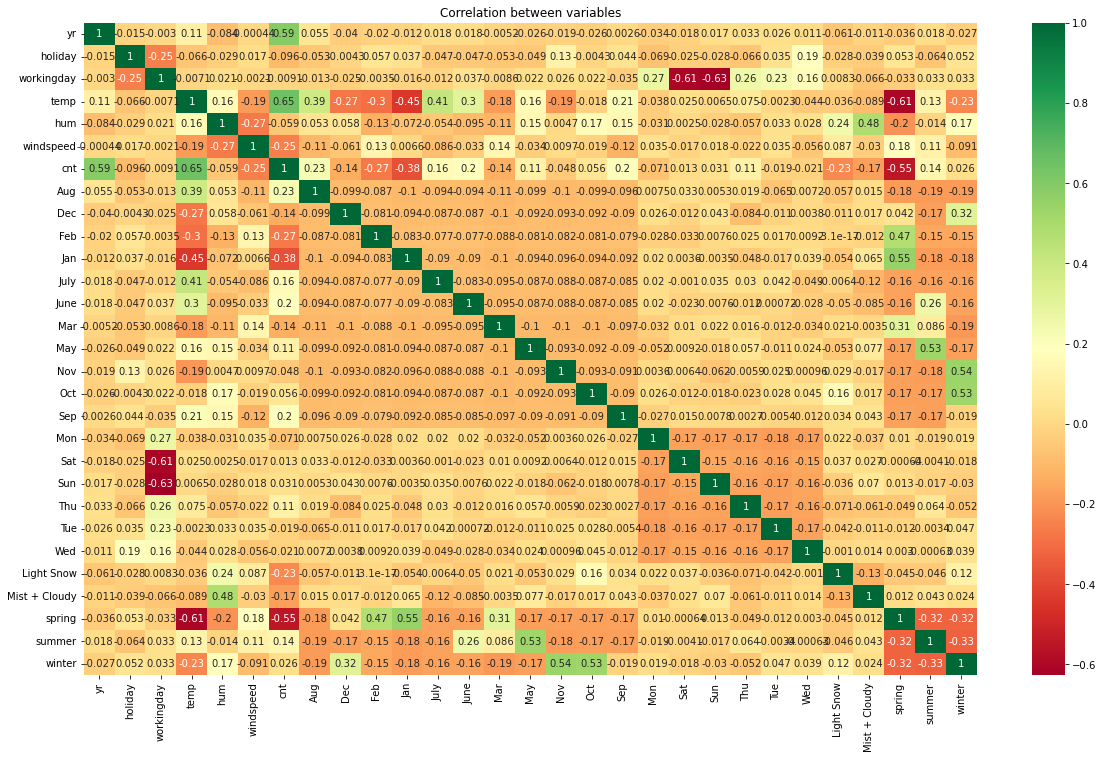

In [22]:
#checking correlation between variables in training set
plt.figure(figsize=(20, 12))
sns.heatmap(day_train.corr(), cmap='RdYlGn', annot=True)
plt.title('Correlation between variables')
plt.show()

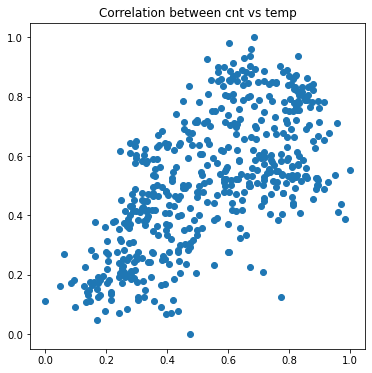

In [23]:
#checking for correlation between cnt and temp
plt.figure(figsize=[6,6])
plt.scatter(day_train.temp, day_train.cnt)
plt.title('Correlation between cnt vs temp')
plt.show()

## Dividing into X and Y sets for model building

In [91]:
y_train = day_train.pop('cnt')
X_train = day_train

## Building the linear model

In [92]:
# adding constant
X_train_lm = sm.add_constant(X_train[['temp']])

In [93]:
#cearting the first model
lr = sm.OLS(y_train, X_train_lm)

#fitting the model
lr=lr.fit()

In [94]:
#coefficients
lr.params

const    0.169031
temp     0.640944
dtype: float64

In [95]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Tue, 09 Aug 2022   Prob (F-statistic):           2.46e-61
Time:                        10:26:09   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared is 0.416 which means 41.6% of the variance is explained by temp

In [96]:
#adding another variable thus performing multiple regression 
X_train_lm = X_train[['temp', 'yr']]
X_train_lm = sm.add_constant(X_train_lm)

In [97]:
#creating the second model
lr = sm.OLS(y_train, X_train_lm)

#fitting the model
lr=lr.fit()

In [98]:
#params
lr.params

const    0.079266
temp     0.584266
yr       0.236739
dtype: float64

In [99]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     568.2
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          3.34e-130
Time:                        10:26:49   Log-Likelihood:                 338.80
No. Observations:                 510   AIC:                            -671.6
Df Residuals:                     507   BIC:                            -658.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0793      0.015      5.321      0.000       0.050       0.109
temp           0.5843      0.025     23.698      0.000       0.536       0.633
yr             0.2367      0.011     21.276      0.000       0.215       0.259
==============================================================================
Omnibus:                       32.310   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.054
Skew:                          -0.513   Prob(JB):                     2.71e-10
Kurtosis:                       4.010   Cond. No.                         6.41
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared value has increased to 0.692 which means now we can explain 69.2% of variance via to variables.

In [100]:
#adding all variables now
day.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'Light Snow', 'Mist + Cloudy',
       'spring', 'summer', 'winter'],
      dtype='object')

In [101]:
#building model with all variables
X_train_lm = sm.add_constant(X_train)

In [102]:
#creating the third model
lr = sm.OLS(y_train, X_train_lm)

#fitting the model
lr=lr.fit()

In [103]:
#params
lr.params

const            0.391163
yr               0.231135
holiday         -0.134754
workingday      -0.060049
temp             0.440512
hum             -0.157355
windspeed       -0.182486
Aug              0.027307
Dec             -0.044387
Feb             -0.037422
Jan             -0.064209
July            -0.028504
June             0.008393
Mar              0.000800
May              0.024732
Nov             -0.039553
Oct              0.005634
Sep              0.090823
Mon             -0.024621
Sat             -0.055719
Sun             -0.049460
Thu              0.004227
Tue             -0.026072
Wed             -0.010225
Light Snow      -0.249947
Mist + Cloudy   -0.057848
spring          -0.040386
summer           0.046443
winter           0.112621
dtype: float64

In [104]:
#checking summary with all the variables
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     97.49
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          1.34e-178
Time:                        10:27:42   Log-Likelihood:                 522.99
No. Observations:                 510   AIC:                            -988.0
Df Residuals:                     481   BIC:                            -865.2
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3912      0.085      4.594      0.000       0.224       0.558
yr                0.2311      0.008     28.384      0.000       0.215       0.247
holiday          -0.1348      0.065     -2.059      0.040      -0.263      -0.006
workingday       -0.0600      0.071     -0.844      0.399      -0.200       0.080
temp              0.4405      0.047      9.412      0.000       0.349       0.532
hum              -0.1574      0.039     -4.043      0.000      -0.234      -0.081
windspeed        -0.1825      0.026     -7.003      0.000      -0.234      -0.131
Aug               0.0273      0.034      0.806      0.421      -0.039       0.094
Dec              -0.0444      0.034     -1.309      0.191      -0.111       0.022
Feb              -0.0374      0.033     -1.123      0.262      -0.103       0.028
Jan              -0.0642      0.034     -1.894      0.059      -0.131       0.002
July             -0.0285      0.035     -0.808      0.420      -0.098       0.041
June              0.0084      0.025      0.336      0.737      -0.041       0.058
Mar               0.0008      0.025      0.032      0.974      -0.048       0.050
May               0.0247      0.021      1.164      0.245      -0.017       0.066
Nov              -0.0396      0.037     -1.077      0.282      -0.112       0.033
Oct               0.0056      0.036      0.156      0.876      -0.066       0.077
Sep               0.0908      0.032      2.822      0.005       0.028       0.154
Mon              -0.0246      0.015     -1.687      0.092      -0.053       0.004
Sat              -0.0557      0.072     -0.777      0.437      -0.197       0.085
Sun              -0.0495      0.072     -0.691      0.490      -0.190       0.091
Thu               0.0042      0.015      0.282      0.778      -0.025       0.034
Tue              -0.0261      0.015     -1.774      0.077      -0.055       0.003
Wed              -0.0102      0.015     -0.669      0.504      -0.040       0.020
Light Snow       -0.2499      0.027     -9.380      0.000      -0.302      -0.198
Mist + Cloudy    -0.0578      0.011     -5.495      0.000      -0.079      -0.037
spring           -0.0404      0.030     -1.335      0.182      -0.100       0.019
summer            0.0464      0.026      1.761      0.079      -0.005       0.098
winter            0.1126      0.028      3.994      0.000       0.057       0.168
==============================================================================
Omnibus:                       78.047   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.442
Skew:                          -0.762   Prob(JB):                     2.45e-45
Kurtosis:                       5.710   Cond. No.                         70.4
================================================================

## Using RFE (automated approach) to find the best fit model

In [105]:
#creating the RFE object
lm = LinearRegression()
lm.fit(X_train, y_train)

#setting feature selection variables to 15
rfe = RFE(lm, n_features_to_select = 15) 

#fitting rfe ofject on our training dataset
rfe = rfe.fit(X_train, y_train)

In [106]:
#checking the elements selected and the ones rejected in a list after rfe
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 9),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', False, 14),
 ('May', False, 8),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sep', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 4),
 ('Sun', False, 5),
 ('Thu', False, 13),
 ('Tue', False, 6),
 ('Wed', False, 10),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [107]:
#getting the selected feature variables
true_rfe = X_train.columns[rfe.support_]
print(true_rfe)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')


In [108]:
#building model using selected RFE variables
X_train_rfe = X_train[true_rfe]

In [109]:
#adding constant to training variable
X_train_rfe = sm.add_constant(X_train_rfe)

#creating first training model with rfe selected variables
lr = sm.OLS(y_train, X_train_rfe)

#fit
lr_model = lr.fit()

#params
lr_model.params

const            0.319667
yr               0.230404
holiday         -0.091089
temp             0.481503
hum             -0.162213
windspeed       -0.188726
Dec             -0.035461
Jan             -0.043411
July            -0.055250
Nov             -0.038701
Sep              0.075467
Light Snow      -0.246481
Mist + Cloudy   -0.054300
spring          -0.061255
summer           0.042337
winter           0.101921
dtype: float64

In [110]:
#summary of model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          8.15e-189
Time:                        10:28:24   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3197      0.036      8.859      0.000       0.249       0.391
yr                0.2304      0.008     28.487      0.000       0.215       0.246
holiday          -0.0911      0.026     -3.557      0.000      -0.141      -0.041
temp              0.4815      0.037     13.005      0.000       0.409       0.554
hum              -0.1622      0.038     -4.291      0.000      -0.236      -0.088
windspeed        -0.1887      0.026     -7.315      0.000      -0.239      -0.138
Dec              -0.0355      0.018     -2.024      0.043      -0.070      -0.001
Jan              -0.0434      0.018     -2.393      0.017      -0.079      -0.008
July             -0.0553      0.018     -3.030      0.003      -0.091      -0.019
Nov              -0.0387      0.019     -2.057      0.040      -0.076      -0.002
Sep               0.0755      0.017      4.466      0.000       0.042       0.109
Light Snow       -0.2465      0.026     -9.331      0.000      -0.298      -0.195
Mist + Cloudy    -0.0543      0.010     -5.194      0.000      -0.075      -0.034
spring           -0.0613      0.021     -2.881      0.004      -0.103      -0.019
summer            0.0423      0.015      2.761      0.006       0.012       0.072
winter            0.1019      0.018      5.656      0.000       0.067       0.137
==============================================================================
Omnibus:                       66.656   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.040
Skew:                          -0.682   Prob(JB):                     1.07e-35
Kurtosis:                       5.392   Cond. No.                         20.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Checking the VIF of the model

In [111]:
#dropping the constant variables from the dataset
X_train_rfe = X_train_rfe.drop(['const'], axis = 1)

In [112]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features    VIF
3             hum  30.89
2            temp  17.79
4       windspeed   4.72
12         spring   4.37
14         winter   4.06
13         summer   2.82
11  Mist + Cloudy   2.32
0              yr   2.09
8             Nov   1.85
6             Jan   1.75
7            July   1.59
5             Dec   1.56
9             Sep   1.41
10     Light Snow   1.28
1         holiday   1.06

In [113]:
#dropping hum variable due to high VIF
X_train_new_1 = X_train_rfe.drop(['hum'], axis = 1)

In [114]:
#adding constant to training variable
X_train_lr1 = sm.add_constant(X_train_new_1)

#creating the training model
lr = sm.OLS(y_train, X_train_lr1)

#fit
lr_model = lr.fit()

#summary
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 09 Aug 2022   Prob (F-statistic):          4.75e-186
Time:                        10:31:56   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2450      0.032      7.618      0.000       0.182       0.308
yr                0.2345      0.008     28.687      0.000       0.218       0.251
holiday          -0.0918      0.026     -3.522      0.000      -0.143      -0.041
temp              0.4387      0.036     12.093      0.000       0.367       0.510
windspeed        -0.1585      0.025     -6.276      0.000      -0.208      -0.109
Dec              -0.0428      0.018     -2.413      0.016      -0.078      -0.008
Jan              -0.0500      0.018     -2.719      0.007      -0.086      -0.014
July             -0.0500      0.019     -2.703      0.007      -0.086      -0.014
Nov              -0.0395      0.019     -2.064      0.040      -0.077      -0.002
Sep               0.0687      0.017      4.015      0.000       0.035       0.102
Light Snow       -0.2917      0.025    -11.840      0.000      -0.340      -0.243
Mist + Cloudy    -0.0801      0.009     -9.198      0.000      -0.097      -0.063
spring           -0.0713      0.021     -3.314      0.001      -0.113      -0.029
summer            0.0349      0.015      2.251      0.025       0.004       0.065
winter            0.0869      0.018      4.831      0.000       0.052       0.122
==============================================================================
Omnibus:                       69.242   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.476
Skew:                          -0.698   Prob(JB):                     5.81e-38
Kurtosis:                       5.473   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
#calculating the VIF of the model
vif = pd.DataFrame()
X = X_train_new_1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

Features   VIF
2            temp  5.17
3       windspeed  4.67
13         winter  2.95
11         spring  2.89
12         summer  2.24
0              yr  2.07
7             Nov  1.81
5             Jan  1.66
6            July  1.59
10  Mist + Cloudy  1.57
4             Dec  1.47
8             Sep  1.35
9      Light Snow  1.09
1         holiday  1.06

Since there are no other variables with high VIF and high p-value and 83.9% of the data variance can be explained, we can go for residual analysis

## Residual Analysis

In [116]:
#getting the y_train_pred for residual analysis
y_train_pred = lr_model.predict(X_train_lr1)

Text(0.5, 0, 'Errors')

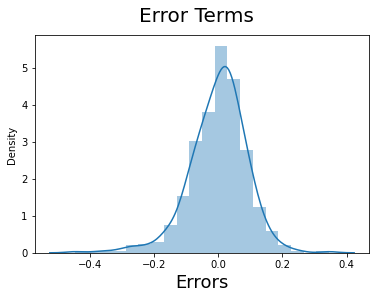

In [117]:
# Plotting histogram for the error terms
fig = plt.figure()
res = y_train - y_train_pred
sns.distplot(res, bins = 20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)

The error terms are all normally distributed, then we can make predictions on final model.

## Making Predictions Using the Final Model

In [118]:
num_var

['hum', 'windspeed', 'temp', 'cnt']

Doing the same set of pre-processing on Test set

In [119]:
#re-scaling the test set
day_test[num_var] = scaler.transform(day_test[num_var])
day_test.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  Aug  \
184   0        1           0  0.831783  0.657364   0.084219  0.692706    0   
535   1        0           1  0.901354  0.610133   0.153728  0.712034    0   
299   0        0           0  0.511964  0.837699   0.334206  0.303382    0   
221   0        0           1  0.881625  0.437098   0.339570  0.547400    1   
152   0        0           0  0.817246  0.314298   0.537414  0.569029    0   

     Dec  Feb  ...  Sat  Sun  Thu  Tue  Wed  Light Snow  Mist + Cloudy  \
184    0    0  ...    0    0    0    0    1           0              1   
535    0    0  ...    0    0    1    0    0           0              0   
299    0    0  ...    1    0    0    0    0           0              1   
221    0    0  ...    0    0    0    0    0           0              0   
152    0    0  ...    1    0    0    0    0           0              0   

     spring  summer  winter  
184       0       0       0  
535       0       1       0  
299       0       0       1  
221       0       0       0  
152       0       1       0  

[5 rows x 29 columns]

In [55]:
day_test.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  220.000000  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.481818    0.036364    0.640909    0.558718    0.638221    0.313293   
std      0.500809    0.187620    0.480828    0.233187    0.148694    0.159584   
min      0.000000    0.000000    0.000000    0.046591    0.261915   -0.042808   
25%      0.000000    0.000000    0.000000    0.355429    0.529197    0.198843   
50%      0.000000    0.000000    1.000000    0.558172    0.625590    0.300126   
75%      1.000000    0.000000    1.000000    0.755981    0.743798    0.402718   
max      1.000000    1.000000    1.000000    0.984424    1.002146    0.807474   

              cnt         Aug         Dec         Feb  ...         Sat  \
count  220.000000  220.000000  220.000000  220.000000  ...  220.000000   
mean     0.522154    0.059091    0.086364    0.100000  ...    0.172727   
std      0.219163    0.236333    0.281541    0.300684  ...    0.378873   
min      0.048205    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.378595    0.000000    0.000000    0.000000  ...    0.000000   
50%      0.524678    0.000000    0.000000    0.000000  ...    0.000000   
75%      0.677750    0.000000    0.000000    0.000000  ...    0.000000   
max      0.963300    1.000000    1.000000    1.000000  ...    1.000000   

              Sun         Thu         Tue         Wed  Light Snow  \
count  220.000000  220.000000  220.000000  220.000000  220.000000   
mean     0.154545    0.140909    0.122727    0.159091    0.027273   
std      0.362295    0.348721    0.328872    0.366595    0.163248   
min      0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000   

       Mist + Cloudy      spring      summer      winter  
count     220.000000  220.000000  220.000000  220.000000  
mean        0.318182    0.254545    0.263636    0.236364  
std         0.466833    0.436599    0.441609    0.425817  
min         0.000000    0.000000    0.000000    0.000000  
25%         0.000000    0.000000    0.000000    0.000000  
50%         0.000000    0.000000    0.000000    0.000000  
75%         1.000000    1.000000    1.000000    0.000000  
max         1.000000    1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [120]:
#Creating X and Y of Test set
y_test = day_test.pop('cnt')
X_test = day_test

In [121]:
X_train_lr1.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'Dec', 'Jan', 'July',
       'Nov', 'Sep', 'Light Snow', 'Mist + Cloudy', 'spring', 'summer',
       'winter'],
      dtype='object')

In [122]:
#dropping constant
X_train_lr1.drop(columns= 'const', inplace = True)

In [123]:
#creating new X_test set based on the feature variables using RFE
X_test_new = X_test[X_train_lr1.columns]

In [124]:
#adding a constant variable
X_test_new = sm.add_constant(X_test_new)

In [125]:
#making predictions
y_pred = lr_model.predict(X_test_new)
y_pred

184    0.374704
535    0.885450
299    0.423481
221    0.577997
152    0.553288
         ...   
702    0.706443
127    0.525399
640    0.805141
72     0.286994
653    0.742392
Length: 220, dtype: float64

## Model Evaluation

Text(0, 0.5, 'y_pred')

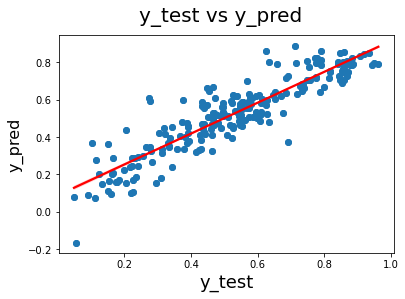

In [126]:
# Plotting y_test and y_pred to understand the spread
fig = plt.figure()
sns.regplot(x=y_test, y=y_pred, ci=52, fit_reg=True, line_kws={"color": "red"})
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [127]:
#r2 score of the test set
r2_test = r2_score(y_true=y_test, y_pred=y_pred)
print('r2 score on the test set is', r2_test)

r2 score on the test set is 0.8136761325817871


In [128]:
#Adjusted r2 score of the test set
Adj_r2=1-(1-r2_test)*(15-1)/(15-1-1)
print('Adjusted r2 score on the test set is',Adj_r2)

Adjusted r2 score on the test set is 0.7993435273957707


In [129]:
#r2 score of the training set
r2_train = r2_score(y_true=y_train, y_pred= y_train_pred)
print('r2 score on the train set is', r2_train)

r2 score on the train set is 0.8391472034949233


In [130]:
#Adjusted r2 score of the training set
Adj_r2_train=1-(1-r2_train)*(15-1)/(15-1-1)
print('Adjusted r2 score on the test set is',Adj_r2_train)

Adjusted r2 score on the test set is 0.8267739114560713


## Equation of best fit line

In [131]:
cf = round(lr_model.params,2)
b1 = cf.sort_values(ascending = False)
b1

temp             0.44
const            0.25
yr               0.23
winter           0.09
Sep              0.07
summer           0.03
Dec             -0.04
Nov             -0.04
Jan             -0.05
July            -0.05
spring          -0.07
Mist + Cloudy   -0.08
holiday         -0.09
windspeed       -0.16
Light Snow      -0.29
dtype: float64

In [132]:
for i in range(0, len(b1)):
    print(b1[i],'*',b1.index[i],end ='')
    print(' + ',end ='')

0.44 * temp + 0.25 * const + 0.23 * yr + 0.09 * winter + 0.07 * Sep + 0.03 * summer + -0.04 * Dec + -0.04 * Nov + -0.05 * Jan + -0.05 * July + -0.07 * spring + -0.08 * Mist + Cloudy + -0.09 * holiday + -0.16 * windspeed + -0.29 * Light Snow + 

Equation of the best fit line is:-
    
cnt = 0.44 * temp + 0.23 * yr + 0.09 * winter + 0.07 * Sep + 0.03 * summer - 0.04 * Dec - 0.04 * Nov - 0.05 * Jan - 0.05 * July - 0.07 * spring - 0.08 * Mist + Cloudy - 0.09 * holiday - 0.16 * windspeed - 0.29 * Light Snow + 0.25

Overall we have a decent model, since the difference between r2 score of train and test set is nearly 2.5%.